In [39]:
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [17]:
dataframe = pd.read_csv("Data/weatherHistory.csv")

In [18]:
dataframe.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [19]:
dataframe = dataframe.head(2000)

In [20]:
dataframe = dataframe.rename(columns=({'Apparent Temperature (C)':'y'}))

In [21]:
dataframe = dataframe.drop(['Formatted Date','Summary','Precip Type','Loud Cover','Daily Summary'], axis =1 )

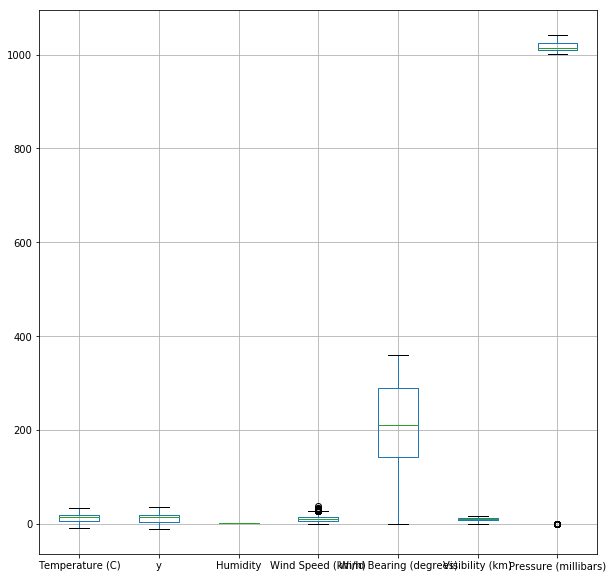

In [22]:
dataframe.boxplot(figsize=(10,10))


In [23]:
dataframe = preprocess_obj.remove_outlier(dataframe)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6370971860>,
      dtype=object)

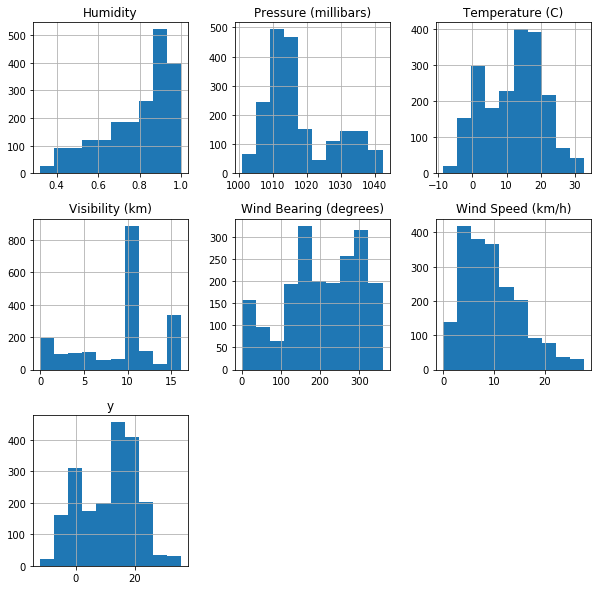

In [24]:
dataframe.hist(figsize=(10,10))


In [25]:
dataframe = dataframe.dropna()


In [26]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 1999
Data columns (total 7 columns):
Temperature (C)           1924 non-null float64
y                         1924 non-null float64
Humidity                  1924 non-null float64
Wind Speed (km/h)         1924 non-null float64
Wind Bearing (degrees)    1924 non-null float64
Visibility (km)           1924 non-null float64
Pressure (millibars)      1924 non-null float64
dtypes: float64(7)
memory usage: 120.2 KB


In [27]:
(dataframe==0).sum()


Temperature (C)            3
y                          1
Humidity                   0
Wind Speed (km/h)         11
Wind Bearing (degrees)    18
Visibility (km)            6
Pressure (millibars)       0
dtype: int64

In [28]:
dataframe, test_data = preprocess_obj.split(dataframe,500)


In [29]:
test_data.shape


(500, 7)

In [30]:
test_data = test_data[test_data['y'] != 0]
test_data.shape

(499, 7)

In [31]:
y = dataframe['y']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6370a63320>,
      dtype=object)

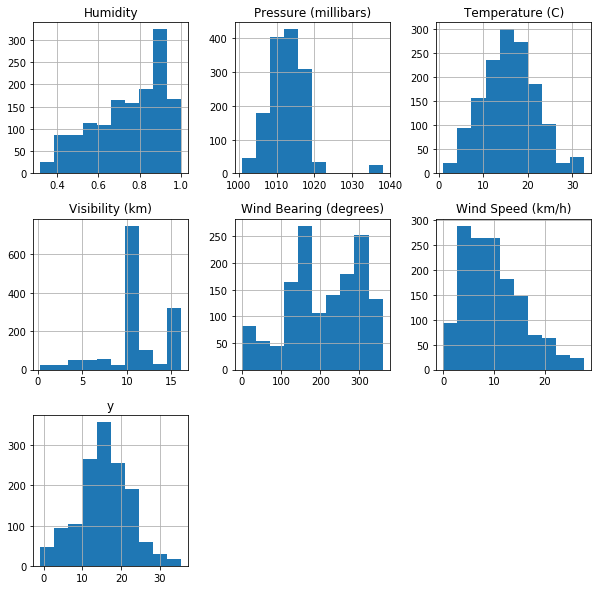

In [32]:
dataframe.hist(figsize=(10,10))


In [33]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),1424.0,15.881055,5.998057,0.955556,11.748611,16.016667,19.906944,32.638889
y,1424.0,15.642541,6.488413,-0.866667,11.748611,16.016667,19.906944,35.494444
Humidity,1424.0,0.750176,0.172740,0.320000,0.620000,0.780000,0.900000,1.000000
Wind Speed (km/h),1424.0,9.840164,5.821188,0.000000,5.212375,9.305800,13.548150,27.740300
Wind Bearing (degrees),1424.0,208.751404,92.209903,0.000000,146.750000,212.000000,290.000000,359.000000
Visibility (km),1424.0,10.989347,3.283134,0.289800,9.982000,11.125100,11.978400,16.100000
Pressure (millibars),1424.0,1012.866383,5.060838,1000.810000,1009.560000,1012.645000,1015.812500,1038.060000


In [53]:
class Gradient_multilinear:

    def __init__(self):
        self.learning_rate = 0.001
        self.iteration = 349
        self.sample_size = 500
        
    def mini_sampler(self,dataframe,counter):
        dataframe = dataframe.loc[(counter*self.sample_size):(counter*self.sample_size)+self.sample_size,:]
        try:
            dataframe.drop('index')
        except Exception as e:
            pass
        return dataframe
    
    def train(self, dataframe):
        weights = np.full((1,dataframe.shape[1]-1),1.0)
        dframe_size = len(dataframe)
        bais = 1.2
        for iterations in range(0,self.iteration):            
            for counter in range(0, int(dataframe.shape[0]/self.sample_size)):
                sample_df = self.mini_sampler(dataframe,counter)
                sample_df,output = preprocess_obj.separate(sample_df,'y')
                output = np.array(output).reshape(output.shape[0],1)
                Ypred = np.add(np.matmul(weights,sample_df.T),bais).reshape(sample_df.shape[0],1)
                diff = np.subtract(output,Ypred)
                cost = np.divide(np.sum(np.square(diff)),(2*dataframe.shape[0]))
#                 cost = np.sum(np.square(diff))/(2*dframe_size)
                diff = abs(diff)
                if (cost==np.inf):
                    print(diff,Ypred.T,output.T,iterations,counter)
                dw = np.divide(np.matmul(diff.T,sample_df),dataframe.shape[0])
                db = np.divide(np.sum(diff),dataframe.shape[0])
                weights = np.subtract(weights,np.multiply(self.learning_rate,dw))
                bais -= np.multiply(self.learning_rate,db)
            plt.plot(iterations,cost,markersize = 0.8,marker='*',color='r')
        return weights,bais
    
    
    def test(self,test_data,weights,bais):
        test_data = test_data[test_data['y'] != 0]
        test_data,Y = preprocess_obj.separate(test_data,'y')
        Y = np.array(Y).reshape(Y.shape[0],1)
        Ypred = np.add(np.dot(test_data,weights.T),bais)
        print(Y.shape,Ypred.shape)
        error = np.divide(np.subtract(Ypred,Y),Y.sum())
        accuracy = np.divide(np.abs(np.sum(error)),test_data.shape[0])
        print("Accuracy = ",accuracy*100)

In [54]:
grad_obj = Gradient_multilinear()


/home/admin1/Downloads/enter/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in square


[[9.96704378e+154]
 [9.97076625e+154]
 [9.96986462e+154]
 [9.97160506e+154]
 [9.97454740e+154]
 [9.97863516e+154]
 [9.98218098e+154]
 [9.92632090e+154]
 [9.95039431e+154]
 [9.96570044e+154]
 [9.98675577e+154]
 [9.99168042e+154]
 [1.00041027e+155]
 [1.00047283e+155]
 [1.00024393e+155]
 [1.00870449e+155]
 [1.01933264e+155]
 [1.03289044e+155]
 [9.89714576e+154]
 [1.00154362e+155]
 [1.02904468e+155]
 [9.84238962e+154]
 [1.01615507e+155]
 [9.78625521e+154]
 [1.00353411e+155]
 [1.01900108e+155]
 [1.02749079e+155]
 [1.03094475e+155]
 [1.01247869e+155]
 [1.02722692e+155]
 [1.02099127e+155]
 [9.80086707e+154]
 [9.75057066e+154]
 [9.85491194e+154]
 [9.84368069e+154]
 [1.02872274e+155]
 [1.03471817e+155]
 [1.03629970e+155]
 [1.02993029e+155]
 [9.99412816e+154]
 [9.97721030e+154]
 [1.00139678e+155]
 [9.97147320e+154]
 [9.96965352e+154]
 [9.93767106e+154]
 [9.93531139e+154]
 [9.90697603e+154]
 [9.89810635e+154]
 [9.96730531e+154]
 [9.97258724e+154]
 [9.97938669e+154]
 [1.00050373e+155]
 [9.97509305

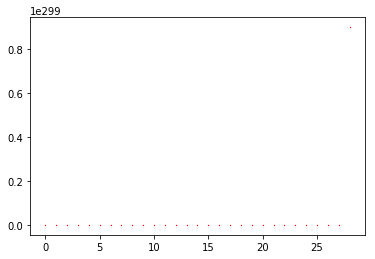

In [55]:
weights,bais = grad_obj.train(dataframe)


In [49]:
grad_obj.test(test_data,weights,bais)

(499, 1) (499, 1)
Accuracy =  nan
